In [1]:
%matplotlib inline
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

### Consistency
---

Suppose that $X_1,X_2,\dots,X_n,\dots$ is a sequence of independent random variable with mean $\mu$ and variance $\sigma^2$. Then

\begin{equation*}
 \lim_{n\to\infty}\Pr\{|\bar X_n - \mu|\geqq \epsilon\}=0,
\end{equation*}

for any given number $\epsilon>0$.

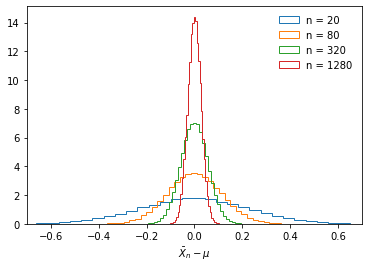

In [2]:
np.random.seed(99)
fig1 = plt.figure(num=1, facecolor='w')
n = np.array([20, 80, 320, 1280])
m = 100000
for idx in range(n.size):
    sample_mean = st.uniform.rvs(loc=-np.sqrt(3.0), scale=2.0*np.sqrt(3.0), size=(m, n[idx])).mean(axis=1)
    plt.hist(sample_mean, density=True, histtype='step', bins=40)
plt.legend(['n = 20', 'n = 80', 'n = 320', 'n = 1280'], loc='best', frameon=False)
plt.xlabel('$\\bar{X}_n - \\mu$')
plt.xlim((-0.7,0.7))
plt.show()

### Asymptotic Normality
---

Suppose $X_1,\dots,X_n$ are independent random variables with mean $\mu$ and variance $\sigma^2$, and define

\begin{equation*}
 \bar X_n = \frac1n\sum_{i=1}^n X_i,\quad
 s_n^2 = \frac1{n-1}\sum_{i=1}^n(X_i - \bar X_n)^2.
\end{equation*}

Then

\begin{equation*}
 \frac{\sqrt{n}(\bar X_n - \mu)}{s_n}\stackrel{d}{\to}\mathcal{N}(0,1).
\end{equation*}


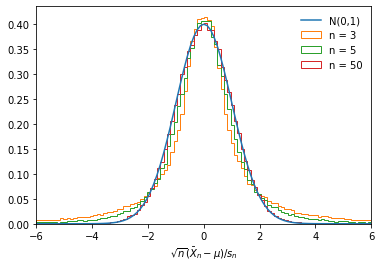

In [3]:
np.random.seed(99)
fig3 = plt.figure(num=3, facecolor='w')
x = np.linspace(-6.0, 6.0, 101)
plt.plot(x, st.norm.pdf(x))
n = np.array([3, 5, 50])
m = 100000
for idx in range(n.size):
    sample = st.uniform.rvs(loc=-np.sqrt(3.0), scale=2.0*np.sqrt(3.0), size=(m, n[idx]))
    sample_mean = sample.mean(axis=1)
    se = sample.std(axis=1, ddof=1) / np.sqrt(n[idx])
    t_value = sample_mean / se
    plt.hist(t_value, density=True, histtype='step', bins=100 , range=(-6.0, 6.0))
plt.legend(['N(0,1)', 'n = 3', 'n = 5', 'n = 50'], loc='best', frameon=False)
plt.xlabel('$\\sqrt{n}(\\bar{X}_n - \\mu)/s_n$')
plt.xlim((-6.0, 6.0))
plt.show()